# Cross sale analysis

The Colab is the prediction model to predict the current insurance clients who will also be interested in vehicle Insurance provided by the same company.

Reference data : https://www.kaggle.com/anmolkumar/health-insurance-cross-sell-prediction


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import nessary library and create user define dunction

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import randrange
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
def train_model(train_data, result):
  model = GradientBoostingClassifier()
  model.fit(train_data, result)
  return model

In [ ]:
def model_acc(predict,actual):
  con_martix = confusion_matrix(predict,actual)
  TN = con_martix[0][0]
  FN = con_martix[1][0]
  FP = con_martix[0][1]
  TP = con_martix[1][1]
  Precision = TP/(TP+FP)
  Recall = TP/(TP+FN)
  return con_martix, Precision, Recall

# Importe data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Cross_sale/cross_sale.csv')
df = df.drop(['id'],axis = 1)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [ ]:
df.isna().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
df.Vehicle_Age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [ ]:
df = df.replace({'< 1 Year':0, '1-2 Year':1,'> 2 Years':2})
df = df.replace({'Male':0, 'Female':1})
df = df.replace({'No':0, 'Yes':1})
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


In [ ]:
train_set, test_set = train_test_split(df, test_size=0.20, random_state=42)
print(len(train_set))
print(len(test_set))

304887
76222


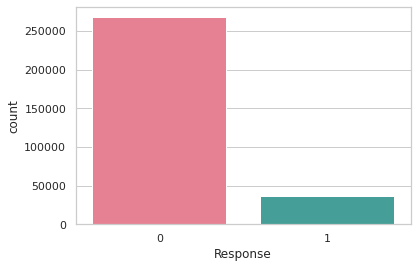

In [ ]:
# Train set
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Response", data = train_set, palette='husl')


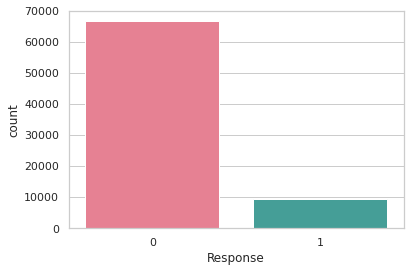

In [ ]:
# Test set
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Response", data = test_set, palette='husl')


In [ ]:
y_train = train_set[['Response']]
y_test = test_set[['Response']]
train_set = train_set.drop(['Response'],axis = 1)
test_set = test_set.drop(['Response'],axis = 1)

In [ ]:
train_set.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
332803,1,39,1,15.0,0,1,1,52906.0,55.0,227
116248,0,38,1,11.0,0,1,1,23038.0,26.0,29
255005,0,22,1,30.0,1,0,0,45318.0,152.0,166
317474,1,23,1,41.0,1,0,0,29132.0,151.0,277
344212,0,56,1,48.0,0,2,1,2630.0,154.0,155


In [ ]:
test_set.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
200222,1,21,1,3.0,1,0,0,20408.0,160.0,72
49766,0,55,1,15.0,0,1,1,37498.0,26.0,102
172201,1,41,1,3.0,0,1,1,2630.0,26.0,90
160713,1,26,1,11.0,0,0,0,2630.0,151.0,268
53272,0,51,1,40.0,0,1,1,34006.0,124.0,265


# Model

In [ ]:
model1 = train_model(train_set, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model1

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
feat_imp = pd.DataFrame()
feat_imp['feat_name'] = train_set.columns
feat_imp['score'] = model.feature_importances_
feat_imp.sort_values(by='score', ascending=False)

,feat_name,score
6,Vehicle_Damage,0.646624
1,Age,0.166210
4,Previously_Insured,0.101631
8,Policy_Sales_Channel,0.052627
3,Region_Code,0.013963
5,Vehicle_Age,0.013517
7,Annual_Premium,0.003852
9,Vintage,0.000752
2,Driving_License,0.000582
0,Gender,0.000243


In [ ]:
pred = model.predict(test_set)

In [ ]:
con_martix, Precision, Recall = model_acc(pred,y_test)
print("Confusion matrix is ")
print(con_martix)
print("Model precision is "+str(Precision))
print("Model recall is "+str(Recall))

Confusion matrix is 
[[66699  9523]
 [    0     0]]
Model precision is 0.0
Model recall is nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in long_scalars
  


In [ ]:
print(pred[1:1000])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

# Data processing with numeric method

In [ ]:
df_new = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Cross_sale/cross_sale.csv')
df_new = df_new.drop(['id'],axis = 1)
df_new.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df_one = df_new[df_new['Response'] != 0]
df_one.head()
print(len(df_one))

46710


In [ ]:
df_zero = df_new[df_new['Response'] != 1]
df_zero.head()
print(len(df_zero))

334399


In [ ]:
df_zero1,df_zero2 = train_test_split(df_zero, test_size = 0.20, random_state=20)
print(len(df_zero1))
print(len(df_zero2))

267519
66880


In [ ]:
new_dataset = df_one.append([df_zero2])
print(len(new_dataset))
new_dataset.head()

113590


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
7,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
10,Female,47,1,35.0,0,1-2 Year,Yes,47576.0,124.0,46,1
15,Male,37,1,6.0,0,1-2 Year,Yes,2630.0,156.0,147,1


In [ ]:
new_dataset = new_dataset.sample(frac=1).reset_index(drop=True)
new_dataset.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,23,1,32.0,0,< 1 Year,Yes,29294.0,151.0,16,0
1,Male,64,1,18.0,1,1-2 Year,No,28478.0,124.0,201,0
2,Female,28,1,24.0,1,< 1 Year,No,28052.0,152.0,149,0
3,Female,60,1,48.0,0,1-2 Year,No,2630.0,26.0,168,0
4,Male,22,1,12.0,0,< 1 Year,Yes,25520.0,160.0,104,0


In [ ]:
new_dataset = new_dataset.replace({'< 1 Year':0, '1-2 Year':1,'> 2 Years':2})
new_dataset = new_dataset.replace({'No':0, 'Yes':1})
new_dataset = new_dataset.replace({'Male':0, 'Female':1})
new_dataset_clean = new_dataset
new_dataset_clean.head(10)


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,23,1,32.0,0,0,1,29294.0,151.0,16,0
1,0,64,1,18.0,1,1,0,28478.0,124.0,201,0
2,1,28,1,24.0,1,0,0,28052.0,152.0,149,0
3,1,60,1,48.0,0,1,0,2630.0,26.0,168,0
4,0,22,1,12.0,0,0,1,25520.0,160.0,104,0
5,1,24,1,9.0,1,0,0,35914.0,160.0,51,0
6,0,44,1,28.0,0,1,1,2630.0,154.0,216,1
7,0,41,1,17.0,0,1,1,2630.0,124.0,107,0
8,0,45,1,26.0,0,1,1,36398.0,120.0,35,0
9,1,72,1,28.0,0,1,1,46354.0,25.0,56,0


In [ ]:
train_set_new, test_set_new = train_test_split(new_dataset_clean, test_size=0.20, random_state=10)
print(len(train_set_new))
print(len(test_set_new))

90872
22718


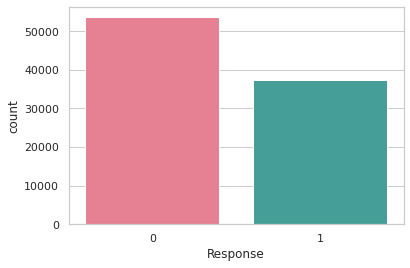

In [ ]:
# Train set
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Response", data = train_set_new, palette='husl')


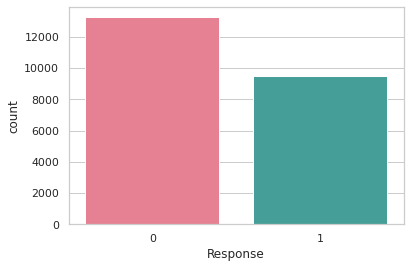

In [ ]:
# Test
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="Response", data = test_set_new, palette='husl')

In [ ]:
y_train_new = train_set_new[['Response']]
y_test_new = test_set_new[['Response']]
print(len(y_train_new))
print(len(y_test_new))

90872
22718


In [ ]:
train_set_new = train_set_new.drop(['Response'],axis = 1)
test_set_new = test_set_new.drop(['Response'],axis = 1)

In [ ]:
print(len(train_set_new))
train_set_new.head()

90872


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
5,1,24,1,9.0,1,0,0,35914.0,160.0,51
92633,0,45,1,28.0,0,1,1,34598.0,26.0,57
75579,1,38,1,28.0,1,1,0,38991.0,26.0,164
48103,1,40,1,14.0,0,1,0,2630.0,156.0,192
112031,0,38,1,25.0,0,1,1,28608.0,124.0,62


In [ ]:
print(len(test_set_new))
test_set_new.head()

22718


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
31379,0,49,1,0.0,0,1,1,2630.0,26.0,287
97695,0,51,1,28.0,0,2,1,69856.0,124.0,148
21189,0,47,1,11.0,0,1,1,18633.0,124.0,193
1603,0,25,1,3.0,1,0,0,25955.0,152.0,86
27681,0,40,1,28.0,0,1,1,36348.0,124.0,40


# Model

In [ ]:
model2 = train_model(train_set_new, y_train_new)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
model2

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
pred_2 = model2.predict(test_set_new)

In [ ]:
con_martix, Precision, Recall = model_acc(pred_2,y_test_new)
print("Confusion matrix is " +str(con_martix))
print("Model precision is "+str(Precision))
print("Model recall is "+str(Recall))

Confusion matrix is [[9364 1093]
 [3892 8369]]
Model precision is 0.8844853096596914
Model recall is 0.68257075279341


No handles with labels found to put in legend.


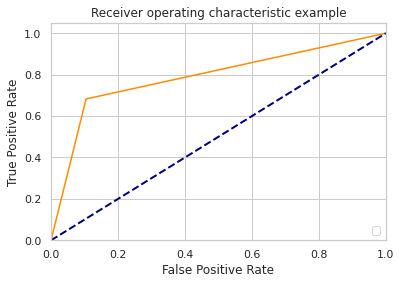

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(pred_2,y_test_new)

plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Data processing with one hot encoding



In [ ]:
train_set_new_mod = train_set_new
test_set_new_mod = test_set_new

In [ ]:
train_set_new_mod.Vehicle_Age = train_set_new_mod.Vehicle_Age.replace({0:'< 1 Year', 1:'1-2 Year',2:'> 2 Years'})
train_set_new_mod.Vehicle_Damage = train_set_new_mod.Vehicle_Damage.replace({0:'No', 1:'Yes'})
train_set_new_mod.Gender = train_set_new_mod.Gender.replace({0:'Male', 1:'Female'})

test_set_new_mod.Vehicle_Age = test_set_new_mod.Vehicle_Age.replace({0:'< 1 Year', 1:'1-2 Year',2:'> 2 Years'})
test_set_new_mod.Vehicle_Damage = test_set_new_mod.Vehicle_Damage.replace({0:'No', 1:'Yes'})
test_set_new_mod.Gender = test_set_new_mod.Gender.replace({0:'Male', 1:'Female'})

In [ ]:
train_set_new_mod.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
5,Female,24,1,9.0,1,< 1 Year,No,35914.0,160.0,51
92633,Male,45,1,28.0,0,1-2 Year,Yes,34598.0,26.0,57
75579,Female,38,1,28.0,1,1-2 Year,No,38991.0,26.0,164
48103,Female,40,1,14.0,0,1-2 Year,No,2630.0,156.0,192
112031,Male,38,1,25.0,0,1-2 Year,Yes,28608.0,124.0,62


In [ ]:
test_set_new_mod.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
31379,Male,49,1,0.0,0,1-2 Year,Yes,2630.0,26.0,287
97695,Male,51,1,28.0,0,> 2 Years,Yes,69856.0,124.0,148
21189,Male,47,1,11.0,0,1-2 Year,Yes,18633.0,124.0,193
1603,Male,25,1,3.0,1,< 1 Year,No,25955.0,152.0,86
27681,Male,40,1,28.0,0,1-2 Year,Yes,36348.0,124.0,40


In [ ]:
dummie_Gender = pd.get_dummies(train_set_new_mod['Gender'])
train_set_new_mod = pd.concat([train_set_new_mod, dummie_Gender], axis=1)
train_set_new_mod = train_set_new_mod.drop('Gender', axis=1)

dummie_Vehicle_Age = pd.get_dummies(train_set_new_mod['Vehicle_Age'])
train_set_new_mod = pd.concat([train_set_new_mod, dummie_Vehicle_Age], axis=1)
train_set_new_mod = train_set_new_mod.drop('Vehicle_Age', axis=1)

dummie_Vehicle_Damage = pd.get_dummies(train_set_new_mod['Vehicle_Damage'])
train_set_new_mod = pd.concat([train_set_new_mod, dummie_Vehicle_Damage], axis=1)
train_set_new_mod = train_set_new_mod.drop('Vehicle_Damage', axis=1)

train_set_new_mod.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Female,Male,1-2 Year,< 1 Year,> 2 Years,No,Yes
5,24,1,9.0,1,35914.0,160.0,51,1,0,0,1,0,1,0
92633,45,1,28.0,0,34598.0,26.0,57,0,1,1,0,0,0,1
75579,38,1,28.0,1,38991.0,26.0,164,1,0,1,0,0,1,0
48103,40,1,14.0,0,2630.0,156.0,192,1,0,1,0,0,1,0
112031,38,1,25.0,0,28608.0,124.0,62,0,1,1,0,0,0,1


In [ ]:
dummie_Gender = pd.get_dummies(test_set_new_mod['Gender'])
test_set_new_mod = pd.concat([test_set_new_mod, dummie_Gender], axis=1)
test_set_new_mod = test_set_new_mod.drop('Gender', axis=1)

dummie_Vehicle_Age = pd.get_dummies(test_set_new_mod['Vehicle_Age'])
test_set_new_mod = pd.concat([test_set_new_mod, dummie_Vehicle_Age], axis=1)
test_set_new_mod = test_set_new_mod.drop('Vehicle_Age', axis=1)

dummie_Vehicle_Damage = pd.get_dummies(test_set_new_mod['Vehicle_Damage'])
test_set_new_mod = pd.concat([test_set_new_mod, dummie_Vehicle_Damage], axis=1)
test_set_new_mod = test_set_new_mod.drop('Vehicle_Damage', axis=1)

test_set_new_mod.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Female,Male,1-2 Year,< 1 Year,> 2 Years,No,Yes
31379,49,1,0.0,0,2630.0,26.0,287,0,1,1,0,0,0,1
97695,51,1,28.0,0,69856.0,124.0,148,0,1,0,0,1,0,1
21189,47,1,11.0,0,18633.0,124.0,193,0,1,1,0,0,0,1
1603,25,1,3.0,1,25955.0,152.0,86,0,1,0,1,0,1,0
27681,40,1,28.0,0,36348.0,124.0,40,0,1,1,0,0,0,1


In [ ]:
model3 = train_model(train_set_new_mod, y_train_new)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pred_3 = model3.predict(test_set_new_mod)

In [ ]:
con_martix, Precision, Recall = model_acc(pred_3,y_test_new)
print("Confusion matrix is " +str(con_martix))
print("Model precision is "+str(Precision))
print("Model recall is "+str(Recall))

Confusion matrix is [[9369 1102]
 [3887 8360]]
Model precision is 0.8835341365461847
Model recall is 0.6826161508940966


# Summary

Colab เป็นการทำ model เพื่อทำนายความน่าจะเป็นที่ลูกค้าประกันสุขภาพจะซื้อประกันยานพาหนะเพิ่ม โดยใช้ข้อมูลจาก www.kaggle.com จากการวิเคราะห์ด้วยแบบจำลอง GradientBoostingClassifier() พบว่าสัดส่วนของข้อมูลผู้ที่ไม่สนใจมีมากกว่าข้อมูลของผู้ที่สนใจ ดังนั้นจึงต้องทำการปรับสัดส่วนข้อมูลให้มีความสมดุลมากขึ้น จากนั้นทำการวิเคราะห์ด้วยแบบจำลอง GradientBoostingClassifier() โดย Model มีค่า Model precision = 0.8845 และ Model recall = 0.6826  จากนั้นจึงได้ทำการปรับปรุงชุดข้อมูลโดยใช้เทคนิค One hot encoding และทำการวิเคราะห์ด้วยแบบจำลอง GradientBoostingClassifier() อีกครั้ง พบว่า Model precision = 0.8835 และ Model recall = 0.6826 
